<a href="https://colab.research.google.com/github/sakongmyoungheun/homework/blob/main/_1%EC%9B%94_2%EC%9D%BC_%EA%B3%BC%EC%A0%9C_%EC%82%AC%EA%B3%B5%EB%AA%85%ED%9D%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 과제1.
앙상블 모델 중 '부스팅','스태킹'에 대해 알아보고 자세히 설명할 수 있는 예제를 만들어보자. (깃허브에 올리기)

# 1. 부스팅(Boosting)
* 머신 러닝에서 사용하는 앙상블학습 기법 중 하나로, 약한 학습기들을 결합하여 강력한 학습기를 만드는 방법

### 1-1. AdaBoost (Adaptive Boosting)
* 초기 모형을 약한 모형으로 설정하며 매 스텝마다 가중치를 이용하여 이전 모형의 약점을 보완하는 새로운 모형을 순차적으로 적합한 뒤 최종적으로 이들을 선형 결합하여 얻어진 모형을 생성시키는 알고리즘
* 초기 모형을 아주 약한 모형으로 설정한 뒤 매 스텝마다 이전 모형의 약점을 보완하는 새로운 모형을 순차적으로 적합시킴
* 장점으로는 과적합의 영향을 덜 받고 구현이 쉬우며 기본 학습기에 제한이 없어 유연하지만 이상치에 민감하고 해석이 어렵다는 단점이 있음

### 1-2. Gradient Boosting
* Gradient를 이용하여 이전 모형의 약점을 보완하는 새로운 모형을 순차적으로 적합한 뒤 이들을 선형 결합하여 얻어진 모형을 생성하는 지도 학습 알고리즘
* 이전 모형의 약점이라함은 실제값을 정확하게 예측하지 못한 정도(잔차)라고 보면되는데 Gradient Boosting은 실제값과 예측값의 차이를 줄여주는 함수를 찾아줌
* 장점으로는 AdaBoost와 같이 구현이 쉽고 잔차를 계속해서 줄여나가는 방식으로 학습하기 때문에 정확도가 좋으나 과적합이 발생할 가능성이 커지고 반복수가 커지면 메모리 사용량이 많아져 문제가 생길수 있다는 단점이 있음

### 1-3. XGBoost
* 기존 Gradient Tree Boosting 알고리즘에 과적합 방지를 위한 기법(파라미터)이 추가된 지도 학습 알고리즘
* Gradient Boosting과 마찬가지로 잔차를 이용하여 이전 모형의 약점을 보완하는 방식으로 학습
* 장점으로는 과적합 방지가 잘 되어 있고 예측 성능이 좋지만 과적합 방지에 많은 데이터가 필요하고 해석이 어렵다는 단점이 있음

# 2. 스테킹(Stacking)
* 여러 다른 모델들의 예측을 결합하여 더 강력한 모델을 생성하는 방법
* 여러 모델이 예측한 결과를 기반으로 최종 예측을 수행하는 메타 모델을 사용

### 2-1. 기본 모델 학습
* 초기에는 여러 가지 다른 기본 모델들을 선태 후 각각의 모델들을 독립적으로 학습시킴

### 2-2. 기본 모델 예측
* 학습된 기본 모델들을 사용하여 훈련 데이터와 검증 데이터에 대한 예측을 수행

### 2-3. 메타 모델 학습
* 기본 모델들의 예측 결과를 입력으로 사용하여 메타 모델을 학습
* 메타 모델을 가끔 이전의 학습한 기본 모델들이 만들어낸 예측 오차를 최소화하도록 학습

### 2-4. 최종 예측
* 새로운 데이터에 대한 예측을 수행할 때는 기본 모델들을 사용하여 예측을 만들고 이들의 예측을 입력으로 사용하여 메타 모델을 통해 최종 예측을 얻음

### 과제2.
아래 사이트에서 데이터를 수집하여 원하는 프로젝트를 선정하고 데이터를 분석
* 캐글(https://www.kaggle.com/)
* 데이콘(https://dacon.io/)
* AI허브(https://www.aihub.or.kr/)



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
LA_data = pd.read_csv('/content/drive/MyDrive/머신러닝과 딥러닝/data/LAD_batting.csv')
LA_data

,Rank,Year,Position,Name,Age,Games,Plate_Appearances,At_Bats,Runs,Hits,Doubles,Triples,Home_Runs,Runs_Batted_In,Stolen_Bases,Caught_Stealing,Base_On_Balls,Strikeouts,Batting_Average,On_Base_Percentage,Slugging_Percentage,On_Base_Plus_Slugging_Percentage,On_Base_Plus_Slugging_Percentage_Plus,Total_Bases,Double_Plays_Grounded_Into,Times_Hit_By_Pitch,Sacrifice_Hits,Sacrifice_Flies,Intentional_Bases_on_Balls,Dominant_Hand,Switch_Hitter
0,1,2023,C,Will Smith,28,126,554,464,80,121,21,2,19,76,3,0,63,89,0.261,0.359,0.438,0.797,114,203,8,15,0,12,2,Right,No
1,2,2023,1B,Freddie Freeman,33,161,730,637,131,211,59,2,29,102,23,1,72,121,0.331,0.410,0.567,0.976,161,361,14,16,0,5,12,Left,No
2,3,2023,2B,Miguel Vargas,23,81,304,256,36,50,15,4,7,32,3,2,38,61,0.195,0.305,0.367,0.672,81,94,1,4,1,4,1,Right,No
3,4,2023,SS,Miguel Rojas,34,124,423,385,49,91,16,1,5,31,8,3,26,48,0.236,0.290,0.322,0.612,66,124,12,5,2,5,0,Right,No
4,5,2023,3B,Max Muncy,32,135,579,482,95,102,17,1,36,105,1,2,85,153,0.212,0.333,0.475,0.808,115,229,8,6,0,6,4,Left,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2753,39,1958,P,Ralph Mauriello,23,3,4,4,0,0,0,0,0,0,0,0,0,2,0.000,0.000,0.000,0.000,-100,0,0,0,0,0,0,Right,No
2754,40,1958,P,Don Bessent,27,19,3,2,0,0,0,0,0,0,0,0,0,1,0.000,0.000,0.000,0.000,-100,0,0,0,1,0,0,Right,No
2755,41,1958,P,Ron Negray,28,4,2,2,0,0,0,0,0,0,0,0,0,1,0.000,0.000,0.000,0.000,-100,0,0,0,0,0,0,Right,No
2756,42,1958,P,Jackie Collum,31,2,1,1,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,-100,0,0,0,0,0,0,Left,No


In [ ]:
pd.set_option('display.max_columns',50)

In [ ]:
LA_data

,Rank,Year,Position,Name,Age,Games,Plate_Appearances,At_Bats,Runs,Hits,Doubles,Triples,Home_Runs,Runs_Batted_In,Stolen_Bases,Caught_Stealing,Base_On_Balls,Strikeouts,Batting_Average,On_Base_Percentage,Slugging_Percentage,On_Base_Plus_Slugging_Percentage,On_Base_Plus_Slugging_Percentage_Plus,Total_Bases,Double_Plays_Grounded_Into,Times_Hit_By_Pitch,Sacrifice_Hits,Sacrifice_Flies,Intentional_Bases_on_Balls,Dominant_Hand,Switch_Hitter
0,1,2023,C,Will Smith,28,126,554,464,80,121,21,2,19,76,3,0,63,89,0.261,0.359,0.438,0.797,114,203,8,15,0,12,2,Right,No
1,2,2023,1B,Freddie Freeman,33,161,730,637,131,211,59,2,29,102,23,1,72,121,0.331,0.410,0.567,0.976,161,361,14,16,0,5,12,Left,No
2,3,2023,2B,Miguel Vargas,23,81,304,256,36,50,15,4,7,32,3,2,38,61,0.195,0.305,0.367,0.672,81,94,1,4,1,4,1,Right,No
3,4,2023,SS,Miguel Rojas,34,124,423,385,49,91,16,1,5,31,8,3,26,48,0.236,0.290,0.322,0.612,66,124,12,5,2,5,0,Right,No
4,5,2023,3B,Max Muncy,32,135,579,482,95,102,17,1,36,105,1,2,85,153,0.212,0.333,0.475,0.808,115,229,8,6,0,6,4,Left,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2753,39,1958,P,Ralph Mauriello,23,3,4,4,0,0,0,0,0,0,0,0,0,2,0.000,0.000,0.000,0.000,-100,0,0,0,0,0,0,Right,No
2754,40,1958,P,Don Bessent,27,19,3,2,0,0,0,0,0,0,0,0,0,1,0.000,0.000,0.000,0.000,-100,0,0,0,1,0,0,Right,No
2755,41,1958,P,Ron Negray,28,4,2,2,0,0,0,0,0,0,0,0,0,1,0.000,0.000,0.000,0.000,-100,0,0,0,0,0,0,Right,No
2756,42,1958,P,Jackie Collum,31,2,1,1,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,-100,0,0,0,0,0,0,Left,No


In [ ]:
LA_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2758 entries, 0 to 2757
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Rank                                   2758 non-null   int64  
 1   Year                                   2758 non-null   int64  
 2   Position                               2723 non-null   object 
 3   Name                                   2758 non-null   object 
 4   Age                                    2758 non-null   int64  
 5   Games                                  2758 non-null   int64  
 6   Plate_Appearances                      2758 non-null   int64  
 7   At_Bats                                2758 non-null   int64  
 8   Runs                                   2758 non-null   int64  
 9   Hits                                   2758 non-null   int64  
 10  Doubles                                2758 non-null   int64  
 11  Trip

In [ ]:
LA_data.describe(include='object').T

,count,unique,top,freq
Position,2723,15,P,1235
Name,2758,1040,Bill Russell,18
Dominant_Hand,2758,2,Right,1930
Switch_Hitter,2758,2,No,2541


In [ ]:
LA_data['Position'].value_counts()

P     1235
C      216
OF     182
LF     154
3B     133
1B     119
SS     117
2B     115
UT     113
RF     105
CF     100
IF      75
MI      29
CI      23
DH       7
Name: Position, dtype: int64

In [ ]:
LA_data= LA_data.dropna()
LA_data.isna().mean()

Rank                                     0.0
Year                                     0.0
Position                                 0.0
Name                                     0.0
Age                                      0.0
Games                                    0.0
Plate_Appearances                        0.0
At_Bats                                  0.0
Runs                                     0.0
Hits                                     0.0
Doubles                                  0.0
Triples                                  0.0
Home_Runs                                0.0
Runs_Batted_In                           0.0
Stolen_Bases                             0.0
Caught_Stealing                          0.0
Base_On_Balls                            0.0
Strikeouts                               0.0
Batting_Average                          0.0
On_Base_Percentage                       0.0
Slugging_Percentage                      0.0
On_Base_Plus_Slugging_Percentage         0.0
On_Base_Pl

In [ ]:
# 타격 성적으로 포지션을 구분하는 방법
LA_data = LA_data.drop(['Rank','Year','Age','Name','Dominant_Hand','Switch_Hitter'], axis=1)
LA_data

,Position,Games,Plate_Appearances,At_Bats,Runs,Hits,Doubles,Triples,Home_Runs,Runs_Batted_In,Stolen_Bases,Caught_Stealing,Base_On_Balls,Strikeouts,Batting_Average,On_Base_Percentage,Slugging_Percentage,On_Base_Plus_Slugging_Percentage,On_Base_Plus_Slugging_Percentage_Plus,Total_Bases,Double_Plays_Grounded_Into,Times_Hit_By_Pitch,Sacrifice_Hits,Sacrifice_Flies,Intentional_Bases_on_Balls
0,C,126,554,464,80,121,21,2,19,76,3,0,63,89,0.261,0.359,0.438,0.797,114,203,8,15,0,12,2
1,1B,161,730,637,131,211,59,2,29,102,23,1,72,121,0.331,0.410,0.567,0.976,161,361,14,16,0,5,12
2,2B,81,304,256,36,50,15,4,7,32,3,2,38,61,0.195,0.305,0.367,0.672,81,94,1,4,1,4,1
3,SS,124,423,385,49,91,16,1,5,31,8,3,26,48,0.236,0.290,0.322,0.612,66,124,12,5,2,5,0
4,3B,135,579,482,95,102,17,1,36,105,1,2,85,153,0.212,0.333,0.475,0.808,115,229,8,6,0,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2753,P,3,4,4,0,0,0,0,0,0,0,0,0,2,0.000,0.000,0.000,0.000,-100,0,0,0,0,0,0
2754,P,19,3,2,0,0,0,0,0,0,0,0,0,1,0.000,0.000,0.000,0.000,-100,0,0,0,1,0,0
2755,P,4,2,2,0,0,0,0,0,0,0,0,0,1,0.000,0.000,0.000,0.000,-100,0,0,0,0,0,0
2756,P,2,1,1,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,-100,0,0,0,0,0,0


In [ ]:
LA_data.isna().sum()

Position                                 0
Games                                    0
Plate_Appearances                        0
At_Bats                                  0
Runs                                     0
Hits                                     0
Doubles                                  0
Triples                                  0
Home_Runs                                0
Runs_Batted_In                           0
Stolen_Bases                             0
Caught_Stealing                          0
Base_On_Balls                            0
Strikeouts                               0
Batting_Average                          0
On_Base_Percentage                       0
Slugging_Percentage                      0
On_Base_Plus_Slugging_Percentage         0
On_Base_Plus_Slugging_Percentage_Plus    0
Total_Bases                              0
Double_Plays_Grounded_Into               0
Times_Hit_By_Pitch                       0
Sacrifice_Hits                           0
Sacrifice_F

<ipython-input-221-c18ba6ffa394>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(LA_data.corr(),cmap='coolwarm',vmin=-1, vmax=1,annot=True)


<Axes: >

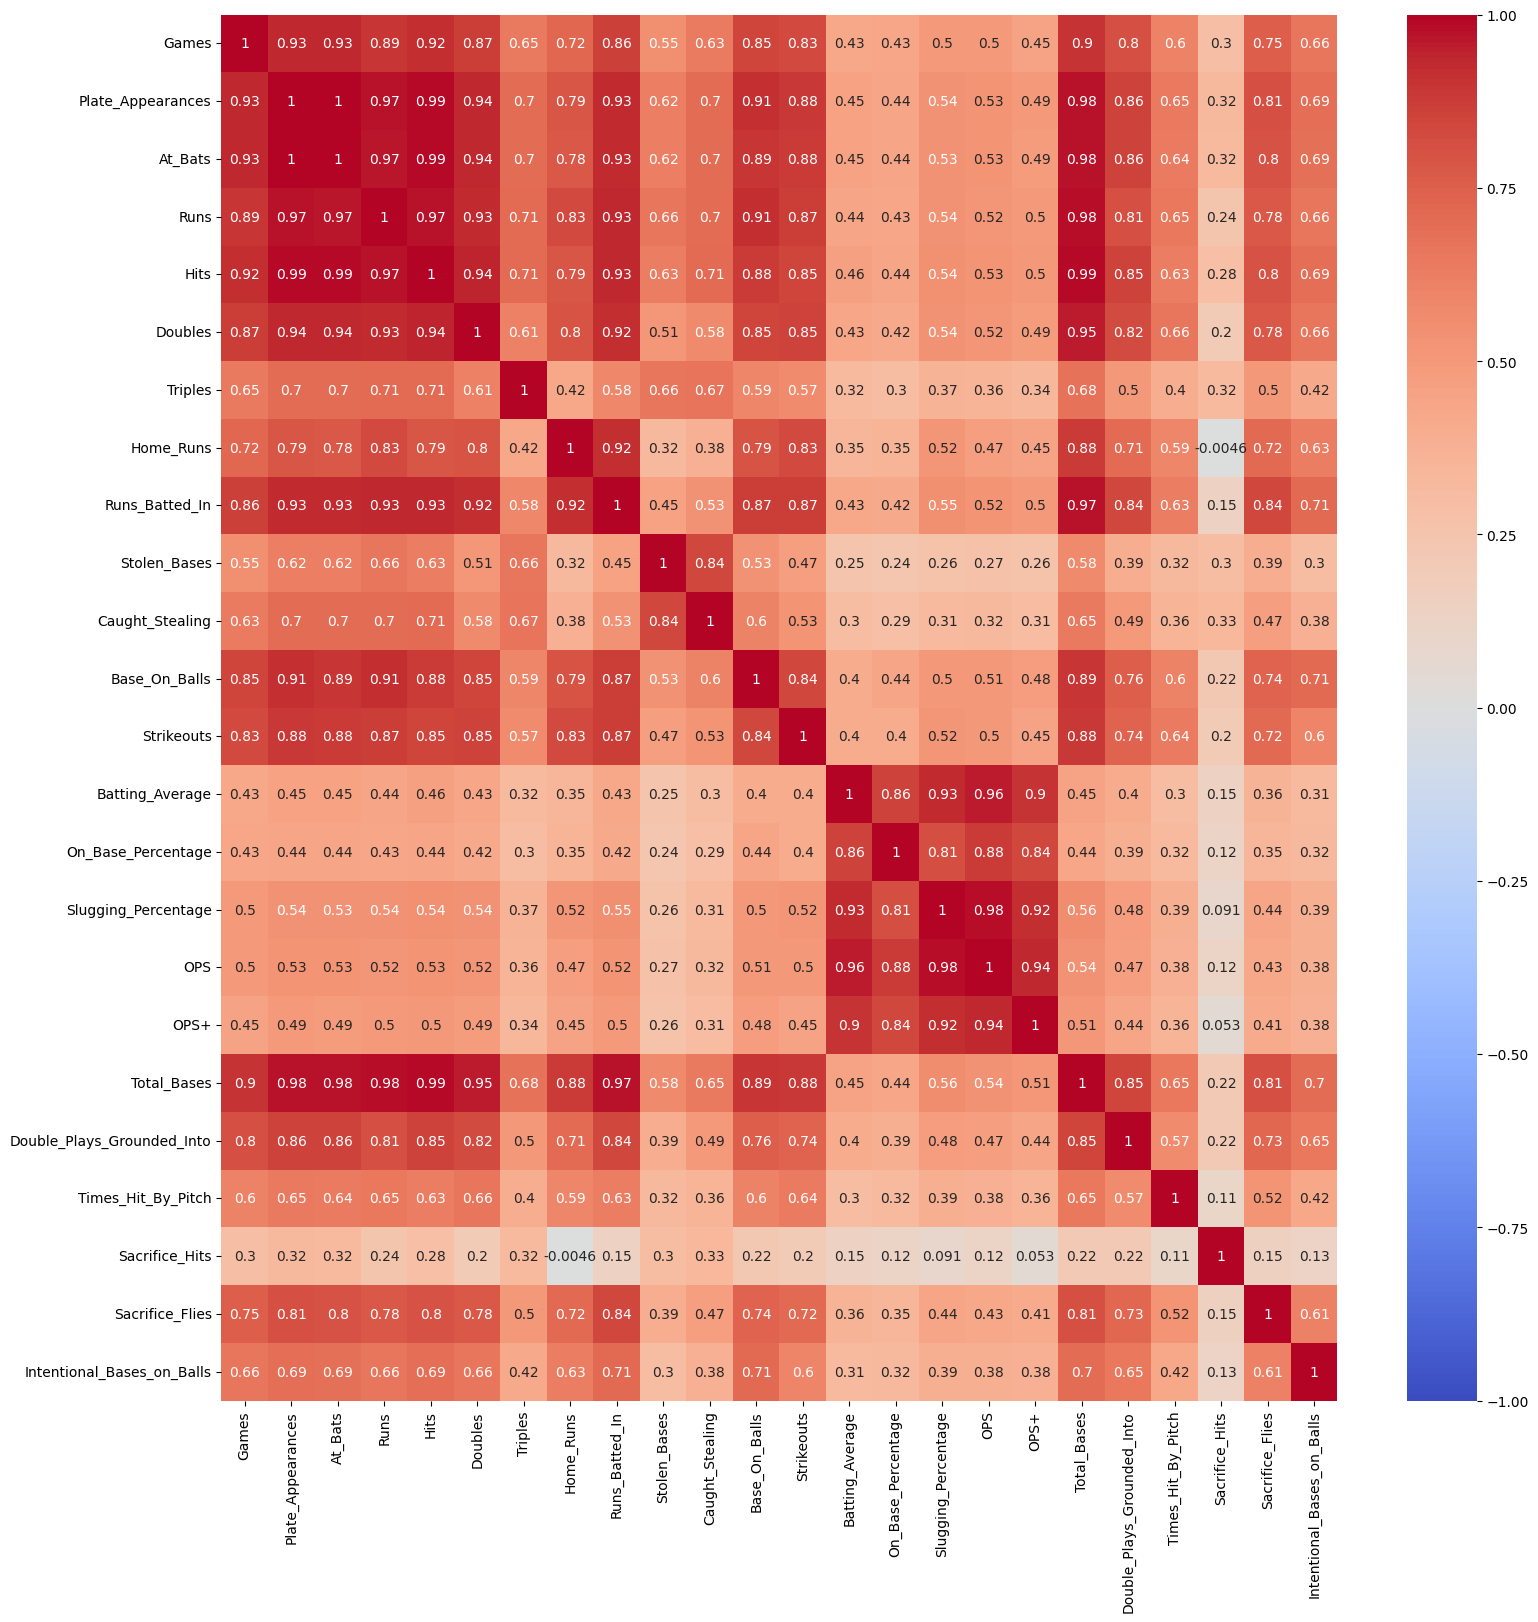

In [ ]:
plt.figure(figsize=(18,18))
sns.heatmap(LA_data.corr(),cmap='coolwarm',vmin=-1, vmax=1,annot=True)

In [ ]:
LA_data.rename(columns={'On_Base_Plus_Slugging_Percentage':'OPS','On_Base_Plus_Slugging_Percentage_Plus':'OPS+'}, inplace=True)
LA_data.head()

,Position,Games,Plate_Appearances,At_Bats,Runs,Hits,Doubles,Triples,Home_Runs,Runs_Batted_In,Stolen_Bases,Caught_Stealing,Base_On_Balls,Strikeouts,Batting_Average,On_Base_Percentage,Slugging_Percentage,OPS,OPS+,Total_Bases,Double_Plays_Grounded_Into,Times_Hit_By_Pitch,Sacrifice_Hits,Sacrifice_Flies,Intentional_Bases_on_Balls
0,C,126,554,464,80,121,21,2,19,76,3,0,63,89,0.261,0.359,0.438,0.797,114,203,8,15,0,12,2
1,1B,161,730,637,131,211,59,2,29,102,23,1,72,121,0.331,0.410,0.567,0.976,161,361,14,16,0,5,12
2,2B,81,304,256,36,50,15,4,7,32,3,2,38,61,0.195,0.305,0.367,0.672,81,94,1,4,1,4,1
3,SS,124,423,385,49,91,16,1,5,31,8,3,26,48,0.236,0.290,0.322,0.612,66,124,12,5,2,5,0
4,3B,135,579,482,95,102,17,1,36,105,1,2,85,153,0.212,0.333,0.475,0.808,115,229,8,6,0,6,4


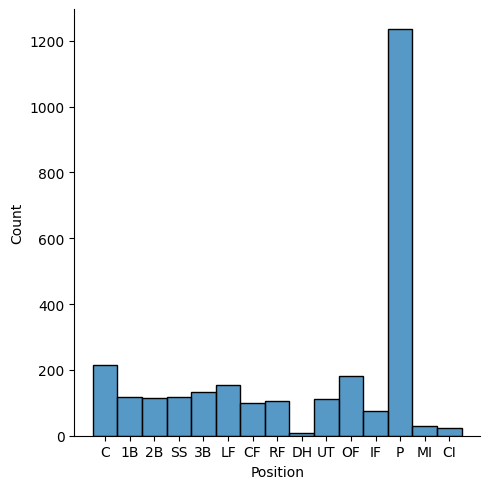

In [ ]:
sns.displot(LA_data['Position'])

<Axes: xlabel='Position', ylabel='Batting_Average'>

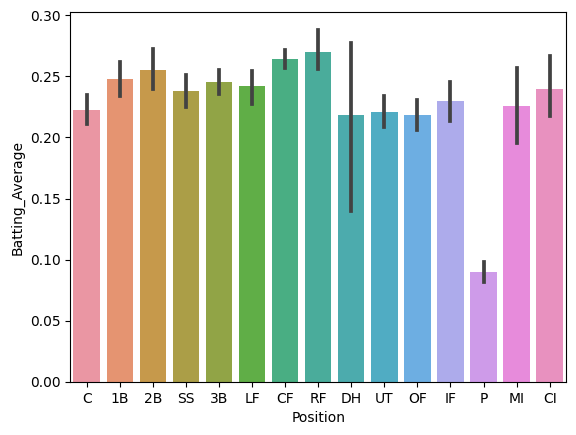

In [ ]:
sns.barplot(x=LA_data['Position'], y=LA_data['Batting_Average'])

<Axes: xlabel='Position', ylabel='Slugging_Percentage'>

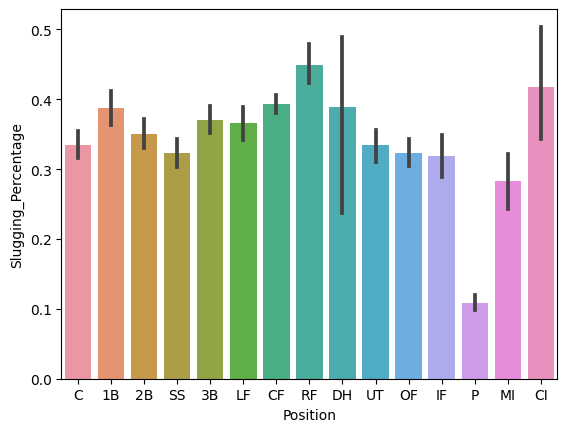

In [ ]:
sns.barplot(x=LA_data['Position'], y=LA_data['Slugging_Percentage'])

<Axes: xlabel='Position', ylabel='OPS+'>

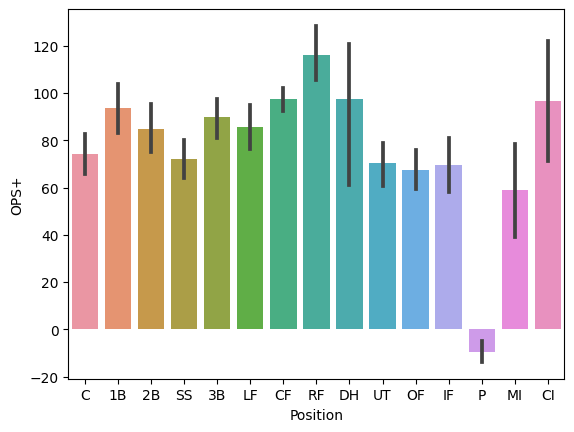

In [ ]:
sns.barplot(x=LA_data['Position'], y=LA_data['OPS+'])

In [ ]:
X = LA_data.drop('Position', axis=1)
y = LA_data['Position']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

In [ ]:
X_train.shape, y_train.shape

((1906, 24), (1906,))

In [ ]:
X_test.shape, y_test.shape

((817, 24), (817,))

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)
pred1 = rf.predict(X_test)

In [ ]:
accuracy_score(y_test, pred1)

0.5642594859241126